# Workshop 3
Marcela Ibarra Mora A01231973 15/08/22

### Hypothesis Testing -- Two-sample t-test

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as pdr

In [21]:
#get the data
data_AMD = pdr.get_data_yahoo('AMD', start="01/01/2017",end="08/15/2022", interval="m")
data_intel = pdr.get_data_yahoo('INTC', start="01/01/2017",end="08/15/2022", interval="m")

In [22]:
print(data_AMD.shape)
print(data_intel.shape)

(68, 6)
(68, 6)


In [23]:
#calculate the returns
data_AMD["r"] = np.log(data_AMD['Adj Close']) - np.log(data_AMD['Adj Close'].shift(1)) 
data_AMD= data_AMD.dropna()

data_intel["r"] = np.log(data_intel['Adj Close']) - np.log(data_intel['Adj Close'].shift(1)) 
data_intel= data_intel.dropna()


In [29]:
N = data_AMD["r"].count()
N

67

H0: mean(r_AMD) - mean(r_INTEL) = 0

Ha: mean(r_AMD) - mean(r_INTEL) <>0

In [24]:
#calculate mean and variance of each dataset
mean_amd = data_AMD["r"].mean()
var_amd = data_AMD["r"].var()

mean_intel = data_intel["r"].mean()
var_intel= data_intel["r"].var()


In [30]:
#calculate the standar error
se = np.sqrt(((var_intel+var_amd)/N))
se

0.021816349992399477

In [27]:
t = ((mean_intel - mean_amd) - 0) / se
t

-1.4766472775896786

El retorno promedio de amd es 1.476 desviaciones estandar mayor al retorno promedio de intel

Verify:

In [32]:
from scipy import stats as st
st.ttest_ind(data_intel["r"],data_AMD["r"],equal_var=False)

Ttest_indResult(statistic=-1.4657493627617062, pvalue=0.14608672795160757)

Cuando si el retorno promedio de amd es mayor al de intel. La t no es mayor a 2 por lo tanto las capanas estan muy una sobre la otra. 

### Install yfinance

In [35]:
# -i https://pypi.anaconda.org/ranaroussi/simple yfinance


Looking in indexes: https://pypi.anaconda.org/ranaroussi/simple


### Measures of linear relationship

In [36]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


<Figure size 432x288 with 0 Axes>

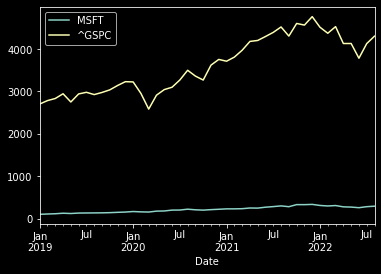

In [37]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [38]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 432x288 with 0 Axes>

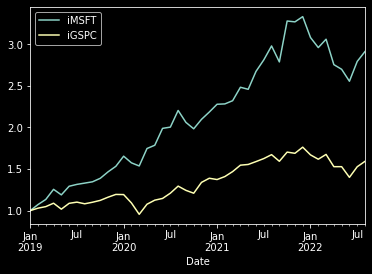

In [39]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [40]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [41]:
r.head()


,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


<Figure size 432x288 with 0 Axes>

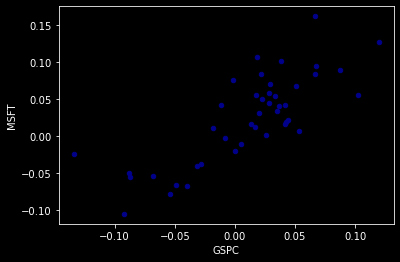

In [42]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

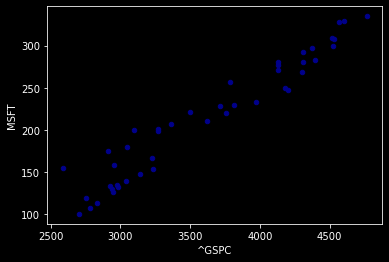

In [43]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

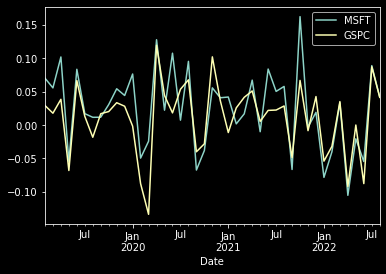

In [44]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

### Calculating covariance and correlation
-- Class Notes on notebook

In [45]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.0025220786826418576

In [46]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00355253, 0.00252208],
       [0.00252208, 0.00285553]])

In [47]:
cov = covm[0,1]
cov

0.0025220786826418576

In [48]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.       , 0.7918569],
       [0.7918569, 1.       ]])

In [49]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7918568956890416

In [50]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

(0.7918568956890419, 2.5560612833870983e-10)